In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches

pd.options.display.max_rows = 1000

In [2]:
def getDataOld(filename):
    data = pd.read_csv(filename, names=['method', 'file', 'status', 'inf_input', 'quant_input', 'cuts_in', 'inf_output', 
                                        'quant_output', 'termset', 'mingrammar', 'num_mingrammars', 'can_sol', 'min_sol', 
                                        'time_termset', 'time_dtable', 'time_grammar', 'time_minsol', 'time_prcons', 
                                        'time_cleanproof'])
    data = data.replace(" ", -1)
    data = data.replace(-1, np.nan)
    data = data.replace('-1', np.nan)
    
    # Setting the correct datatypes
    columns = set(data.keys())
    integer_columns = [c for c in columns if c not in ['method', 'file', 'status']]
    for c in integer_columns:
        data[c] = data[c].astype(np.float)   
    data['method'] = data['method'].astype(str)
    data['file'] = data['file'].astype(str)
    data['status'] = data['status'].astype(str)
    
    # Adding a column for the database
    def getDB (s):
        if 'ExampleProof' in s:
            return 0
        elif 'testing/TSTP' in s:
            return 1
        elif 'testing/veriT' in s:
            return 2
        else:
            return -1
    data['db'] = data.file.apply(getDB)
    
    return data

def getData(filename):
    data = pd.read_json(filename)
    
    # Adding a column for the database
    def getDB (s):
        if 'ExampleProof' in s:
            return 0
        elif 'testing/TSTP' in s:
            return 1
        elif 'testing/veriT' in s:
            return 2
        else:
            return -1
    data['db'] = data.file.apply(getDB)
    
    return data

In [3]:
filename = "results.json"
data = getData(filename)
data

can_sol  cuts_in                                               file  \
0          NaN      NaN                              LinearExampleProof(1)   
1          NaN      NaN                              LinearExampleProof(2)   
2          NaN      NaN                              LinearExampleProof(3)   
3            8        1                              LinearExampleProof(4)   
4            8        1                              LinearExampleProof(5)   
5           12        1                              LinearExampleProof(6)   
6           12        1                              LinearExampleProof(7)   
7           16        1                              LinearExampleProof(8)   
8           12        1                              LinearExampleProof(9)   
9           20        1                             LinearExampleProof(10)   
10          16        1                             LinearExampleProof(11)   
11          16        1                             LinearExampleProof(12)   
12          16        1                             LinearExampleProof(13)   
13          16        1                             LinearExampleProof(14)   
14          20        1                             LinearExampleProof(15)   
15          16        1                             LinearExampleProof(16)   
16          16        1                             LinearExampleProof(17)   
17          24        1                             LinearExampleProof(18)   
18         NaN      NaN                             LinearExampleProof(19)   
19         NaN      NaN                      SquareDiagonalExampleProof(1)   
20           8        1                      SquareDiagonalExampleProof(2)   
21           8        1                      SquareDiagonalExampleProof(3)   
22          16        1                      SquareDiagonalExampleProof(4)   
23           8        1                      SquareDiagonalExampleProof(5)   
24          16        1                      SquareDiagonalExampleProof(6)   
25          16        1                      SquareDiagonalExampleProof(7)   
26          16        1                      SquareDiagonalExampleProof(8)   
27          24        1                      SquareDiagonalExampleProof(9)   
28          16        1                     SquareDiagonalExampleProof(10)   
29          24        1                     SquareDiagonalExampleProof(11)   
30         NaN      NaN                     SquareDiagonalExampleProof(12)   
31         NaN      NaN                         SquareEdgesExampleProof(1)   
32           8        1                         SquareEdgesExampleProof(2)   
33           8        1                         SquareEdgesExampleProof(3)   
34          16        1                         SquareEdgesExampleProof(4)   
35           8        1                         SquareEdgesExampleProof(5)   
36          16        1                         SquareEdgesExampleProof(6)   
37          16        1                         SquareEdgesExampleProof(7)   
38          16        1                         SquareEdgesExampleProof(8)   
39          24        1                         SquareEdgesExampleProof(9)   
40          16        1                        SquareEdgesExampleProof(10)   
41          24        1                        SquareEdgesExampleProof(11)   
42         NaN      NaN                        SquareEdgesExampleProof(12)   
43         NaN      NaN                     SquareEdges2DimExampleProof(1)   
44         NaN      NaN                     SquareEdges2DimExampleProof(2)   
45         NaN      NaN                     SquareEdges2DimExampleProof(3)   
46           8        1                     SquareEdges2DimExampleProof(4)   
47           8        1                     SquareEdges2DimExampleProof(5)   
48          12        1                     SquareEdges2DimExampleProof(6)   
49          12        1                     SquareEdges2DimExampleProof(7)   
50          16        1      

In [4]:
# Other exceptions (aka bugs to hunt)

data_other_exp = data[data.status == 'cutintro_other_exception']
print(data_other_exp.shape)
data_other_exp[['method', 'file', 'status']]

(4249, 26)


method  \
1291          one_cut_one_quant   
3037                        NaN   
3041                        NaN   
3046                        NaN   
3063                        NaN   
3086                        NaN   
3111                        NaN   
3113                        NaN   
3146                        NaN   
3151          one_cut_one_quant   
3155                        NaN   
3168                        NaN   
3222                        NaN   
3226                        NaN   
3232                        NaN   
3251                        NaN   
3280                        NaN   
3286                        NaN   
3296                        NaN   
3307          one_cut_one_quant   
3328          one_cut_one_quant   
3330          one_cut_one_quant   
3430          one_cut_one_quant   
3474          one_cut_one_quant   
3494          one_cut_one_quant   
3525          one_cut_one_quant   
3553          one_cut_one_quant   
3591          one_cut_one_quant   
3823          one_cut_one_quant   
3824                        NaN   
3825          one_cut_one_quant   
3828          one_cut_one_quant   
3829                        NaN   
3831          one_cut_one_quant   
3832                        NaN   
3833          one_cut_one_quant   
3836          one_cut_one_quant   
3838          one_cut_one_quant   
3839          one_cut_one_quant   
3841          one_cut_one_quant   
3843          one_cut_one_quant   
3844          one_cut_one_quant   
3878                        NaN   
3888                        NaN   
3894          one_cut_one_quant   
3911                        NaN   
3915                        NaN   
3916                        NaN   
3920                        NaN   
3930                        NaN   
3937                        NaN   
3941          one_cut_one_quant   
3946                        NaN   
3947                        NaN   
3951                        NaN   
3957          one_cut_one_quant   
3958                        NaN   
3962                        NaN   
3967                        NaN   
3969                        NaN   
3975                        NaN   
3977                        NaN   
3979                        NaN   
3983                        NaN   
3986                        NaN   
3987          one_cut_one_quant   
3990          one_cut_one_quant   
3991          one_cut_one_quant   
3992          one_cut_one_quant   
3993          one_cut_one_quant   
3997          one_cut_one_quant   
4001                        NaN   
4007                        NaN   
4009                        NaN   
4016          one_cut_one_quant   
4018          one_cut_one_quant   
4033          one_cut_one_quant   
4048          one_cut_one_quant   
4053                        NaN   
4056          one_cut_one_quant   
4060                        NaN   
4072          one_cut_one_quant   
4074                        NaN   
4088          one_cut_one_quant   
4098          one_cut_one_quant   
4104                        NaN   
4106                        NaN   
4107                        NaN   
4116                        NaN   
4120          one_cut_one_quant   
4124          one_cut_one_quant   
4127          one_cut_one_quant   
4135          one_cut_one_quant   
4141          one_cut_one_quant   
4142          one_cut_one_quant   
4148          one_cut_one_quant   
4152          one_cut_one_quant   
4153          one_cut_one_quant   
4155          one_cut_one_quant   
4161          one_cut_one_quant   
4165                        NaN   
4167                        NaN   
4176          one_cut_one_quant   
4180                        NaN   
4218          one_cut_one_quant   
4237                        NaN   
4247          one_cut_one_quant   
4248          one_cut_one_quant   
4249                        NaN   
4266                        NaN   
4292          one_cut_one_quant   
4297          one_cut_one_quant   
4298          one_cut_one_quant   
4299                        NaN   


In [5]:
# Test that are ok in one_cut_one_quantifier and fail for many_cuts_one_quantifier_1

data_ocoq = data[data.method == 'one_cut_one_quant']
data_mcoq1 = data[data.method == 'many_cuts_one_quant_1']

merged = pd.merge(data_ocoq, data_mcoq1, on=['file'], suffixes=('_ocoq', '_mcoq1'))

diff = merged[(merged.status_ocoq == 'ok') & (merged.status_mcoq1 != 'ok')]
print(diff.shape)
diff[['file','status_ocoq', 'status_mcoq1']]

(207, 51)


file status_ocoq  \
3                                 LinearExampleProof(4)          ok   
32                           SquareEdgesExampleProof(2)          ok   
56                      SquareEdges2DimExampleProof(14)          ok   
95             FactorialFunctionEqualityExampleProof(4)          ok   
120   testing/TSTP/prover9/SWV/SWV466+1/Prover9---11...          ok   
121   testing/TSTP/prover9/GEO/GEO070-3/Prover9---11...          ok   
162   testing/TSTP/prover9/SET/SET510-6/Prover9---11...          ok   
184   testing/TSTP/prover9/SEU/SEU291+2/Prover9---11...          ok   
207   testing/TSTP/prover9/SET/SET246-6/Prover9---11...          ok   
219   testing/TSTP/prover9/KLE/KLE150+1/Prover9---11...          ok   
222   testing/TSTP/prover9/LCL/LCL526+1/Prover9---11...          ok   
232   testing/TSTP/prover9/SET/SET018-1/Prover9---11...          ok   
248   testing/TSTP/prover9/GRP/GRP039-6/Prover9---11...          ok   
250   testing/TSTP/prover9/RNG/RNG007-1/Prover9---11...          ok   
253   testing/TSTP/prover9/GEO/GEO213+1/Prover9---11...          ok   
264   testing/TSTP/prover9/LCL/LCL026-1/Prover9---11...          ok   
266   testing/TSTP/prover9/SEU/SEU102+1/Prover9---11...          ok   
286   testing/TSTP/prover9/HEN/HEN005-1/Prover9---11...          ok   
300   testing/TSTP/prover9/PLA/PLA002-1/Prover9---11...          ok   
305   testing/TSTP/prover9/REL/REL009+1/Prover9---11...          ok   
357   testing/TSTP/prover9/GEO/GEO187+2/Prover9---11...          ok   
379   testing/TSTP/prover9/LCL/LCL756-1/Prover9---11...          ok   
392   testing/TSTP/prover9/LCL/LCL193-3/Prover9---11...          ok   
398   testing/TSTP/prover9/LCL/LCL225-1/Prover9---11...          ok   
408   testing/TSTP/prover9/SWV/SWV841-1/Prover9---11...          ok   
409   testing/TSTP/prover9/SYN/SYN171-1/Prover9---11...          ok   
411   testing/TSTP/prover9/GEO/GEO213+2/Prover9---11...          ok   
416   testing/TSTP/prover9/SET/SET803+4/Prover9---11...          ok   
453   testing/TSTP/prover9/PRO/PRO014+1/Prover9---11...          ok   
469   testing/TSTP/prover9/MGT/MGT064-1/Prover9---11...          ok   
481   testing/TSTP/prover9/GRP/GRP124-6.004/Prover9-...          ok   
496   testing/TSTP/prover9/FLD/FLD002-3/Prover9---11...          ok   
504   testing/TSTP/prover9/NUM/NUM016-2/Prover9---11...          ok   
505   testing/TSTP/prover9/ALG/ALG029+1/Prover9---11...          ok   
513   testing/TSTP/prover9/FLD/FLD001-3/Prover9---11...          ok   
522   testing/TSTP/prover9/FLD/FLD063-3/Prover9---11...          ok   
550   testing/TSTP/prover9/SEU/SEU188+2/Prover9---11...          ok   
553   testing/TSTP/prover9/GRP/GRP166-2/Prover9---11...          ok   
554   testing/TSTP/prover9/GRP/GRP496-1/Prover9---11...          ok   
573   testing/TSTP/prover9/SYN/SYN613-1/Prover9---11...          ok   
594   testing/TSTP/prover9/SET/SET206-6/Prover9---11...          ok   
604   testing/TSTP/prover9/SET/SET788+1/Prover9---11...          ok   
605   testing/TSTP/prover9/GEO/GEO067-3/Prover9---11...          ok   
667   testing/TSTP/prover9/LCL/LCL453+1/Prover9---11...          ok   
683   testing/TSTP/prover9/SWV/SWV909-1/Prover9---11...          ok   
686   testing/TSTP/prover9/HWV/HWV007-1/Prover9---11...          ok   
691   testing/TSTP/prover9/SWV/SWV408+1/Prover9---11...          ok   
701   testing/TSTP/prover9/SET/SET105-7/Prover9---11...          ok   
723   testing/TSTP/prover9/SWB/SWB014+3/Prover9---11...          ok   
746   testing/TSTP/prover9/SWV/SWV275-2/Prover9---11...          ok   
758   testing/TSTP/prover9/SWV/SWV481+1/Prover9---11...          ok   
772   testing/TSTP/prover9/ALG/ALG030+1/Prover9---11...          ok   
785   testing/TSTP/prover9/GRP/GRP127-1.004/Prover9-...          ok   
803   testing/TSTP/prover9/SET/SET047-5/Prover9---11...          ok   
826   testing/TSTP/prover9/MGT/MGT064+1/Prover9---11...          ok   
842   testing/TSTP/prover9/SYN/SYN077-1/Prover9---11...          ok   
845 

In [6]:
# Test that are ok in many_cuts_one_quantifier_1 and fail for one_cut_one_quantifier

data_ocoq = data[data.method == 'one_cut_one_quant']
data_mcoq1 = data[data.method == 'many_cuts_one_quant_1']

merged = pd.merge(data_ocoq, data_mcoq1, on=['file'], suffixes=('_ocoq', '_mcmq1'))

diff = merged[(merged.status_ocoq != 'ok') & (merged.status_mcmq1 == 'ok')]
print(diff.shape)
diff[['file','status_ocoq', 'status_mcmq1']]

(36, 51)


file  \
18                               LinearExampleProof(19)   
30                       SquareDiagonalExampleProof(12)   
42                          SquareEdgesExampleProof(12)   
68                             LinearEqExampleProof(12)   
74                           SumOfOnesF2ExampleProof(6)   
80                            SumOfOnesFExampleProof(6)   
87                             SumOfOnesExampleProof(7)   
91                 UniformAssociativity3ExampleProof(4)   
101           FactorialFunctionEqualityExampleProof(10)   
294   testing/TSTP/prover9/HWC/HWC002-1/Prover9---11...   
365   testing/TSTP/prover9/SYN/SYN328-1/Prover9---11...   
382   testing/TSTP/prover9/LCL/LCL048-1/Prover9---11...   
543   testing/TSTP/prover9/GRP/GRP134-2.003/Prover9-...   
597   testing/TSTP/prover9/LCL/LCL235-3/Prover9---11...   
638   testing/TSTP/prover9/GRP/GRP129-4.004/Prover9-...   
642   testing/TSTP/prover9/KLE/KLE038+1/Prover9---11...   
759   testing/TSTP/prover9/GRP/GRP144-1/Prover9---11...   
783   testing/TSTP/prover9/LDA/LDA002-1/Prover9---11...   
971   testing/TSTP/prover9/MSC/MSC008-1.002/Prover9-...   
1009  testing/TSTP/prover9/LCL/LCL239-3/Prover9---11...   
1149  testing/TSTP/prover9/GRP/GRP175-4/Prover9---11...   
1239  testing/TSTP/prover9/LCL/LCL206-3/Prover9---11...   
1274  testing/TSTP/prover9/PUZ/PUZ008-3/Prover9---11...   
1276  testing/TSTP/prover9/SYN/SYN328+1/Prover9---11...   
1282  testing/TSTP/prover9/GRP/GRP133-2.003/Prover9-...   
1420  testing/TSTP/prover9/SET/SET661+3/Prover9---11...   
2030  testing/TSTP/prover9/LCL/LCL009-1/Prover9---11...   
2046  testing/TSTP/prover9/SYN/SYN155-1/Prover9---11...   
2111  testing/TSTP/prover9/KLE/KLE022+4/Prover9---11...   
2311  testing/TSTP/prover9/LCL/LCL180-3/Prover9---11...   
2432  testing/TSTP/prover9/LCL/LCL203-3/Prover9---11...   
2462  testing/TSTP/prover9/RNG/RNG008-4/Prover9---11...   
2476  testing/TSTP/prover9/CAT/CAT004-2/Prover9---11...   
2618  testing/TSTP/prover9/GRP/GRP589-1/Prover9---11...   
2670  testing/TSTP/prover9/GRP/GRP159-1/Prover9---11...   
3607  testing/TSTP/leanCoP/SYN/SYN986+1.003/leanCoP-...   

                  status_ocoq status_mcmq1  
18            grammar_timeout           ok  
30            grammar_timeout           ok  
42            grammar_timeout           ok  
68            grammar_timeout           ok  
74            grammar_timeout           ok  
80            grammar_timeout           ok  
87            grammar_timeout           ok  
91            grammar_timeout           ok  
101            prcons_timeout           ok  
294           grammar_timeout           ok  
365           grammar_timeout           ok  
382            prcons_timeout           ok  
543            prcons_timeout           ok  
597           grammar_timeout           ok  
638            prcons_timeout           ok  
642            minsol_timeout           ok  
759           grammar_timeout           ok  
783            prcons_timeout           ok  
971           grammar_timeout           ok  
1009          grammar_timeout           ok  
1149           prcons_timeout           ok  
1239           prcons_timeout           ok  
1274           prcons_timeout           ok  
1276          grammar_timeout           ok  
1282           prcons_timeout           ok  
1420           prcons_timeout           ok  
2030           minsol_timeout           ok  
2046  cutintro_uncompressible           ok  
2111  cutintro_uncompressible           ok  
2311          grammar_timeout           ok  
2432           dtable_timeout           ok  
2462           minsol_timeout           ok  
2476           minsol_timeout           ok  
2618  cutintro_ehs_unprovable           ok  
2670          grammar_timeout           ok  
3607          grammar_timeout           ok

In [7]:
# Regressions compared to previous test

previous_filename = "../2015-03-15/CutIntroDataLog.txt"
previous_data = getDataOld(previous_filename)

merged = pd.merge(data, previous_data, on=['method', 'file'])
#merged.head(0)

regression = merged[(merged.status_y == 'ok') & (merged.status_x != 'ok')]
#regression.head(0)
print(regression.shape)

regression_delta = regression[(regression.method == 'one_cut_one_quant') | (regression.method == 'one_cut_many_quant')]
print(regression_delta.shape)
#regression_delta.head(0)

regression_maxsat = regression[((regression.method == 'many_cuts_one_quant_1') | (regression.method == 'many_cuts_one_quant_2')) ]
print(regression_maxsat.shape)
#regression_maxsat.head(0)

regression[['method', 'file', 'status_x', 'status_y']]

(339, 44)
(124, 44)
(215, 44)


method  \
110        one_cut_one_quant   
129        one_cut_one_quant   
170        one_cut_one_quant   
290        one_cut_one_quant   
295        one_cut_one_quant   
361        one_cut_one_quant   
409        one_cut_one_quant   
451        one_cut_one_quant   
498        one_cut_one_quant   
549        one_cut_one_quant   
567        one_cut_one_quant   
587        one_cut_one_quant   
607        one_cut_one_quant   
609        one_cut_one_quant   
613        one_cut_one_quant   
624        one_cut_one_quant   
675        one_cut_one_quant   
717        one_cut_one_quant   
739        one_cut_one_quant   
750        one_cut_one_quant   
838        one_cut_one_quant   
883        one_cut_one_quant   
908        one_cut_one_quant   
910        one_cut_one_quant   
931        one_cut_one_quant   
961        one_cut_one_quant   
982        one_cut_one_quant   
1034       one_cut_one_quant   
1062       one_cut_one_quant   
1077       one_cut_one_quant   
1118       one_cut_one_quant   
1129       one_cut_one_quant   
1135       one_cut_one_quant   
1205       one_cut_one_quant   
1341       one_cut_one_quant   
1363       one_cut_one_quant   
1370       one_cut_one_quant   
1389       one_cut_one_quant   
1392       one_cut_one_quant   
1413       one_cut_one_quant   
1431       one_cut_one_quant   
1585       one_cut_one_quant   
1702       one_cut_one_quant   
1772       one_cut_one_quant   
1808       one_cut_one_quant   
1864       one_cut_one_quant   
1895       one_cut_one_quant   
2050       one_cut_one_quant   
2070       one_cut_one_quant   
2141       one_cut_one_quant   
2163       one_cut_one_quant   
2205       one_cut_one_quant   
2284       one_cut_one_quant   
2294       one_cut_one_quant   
2308       one_cut_one_quant   
2376       one_cut_one_quant   
2465       one_cut_one_quant   
2472       one_cut_one_quant   
2499       one_cut_one_quant   
2526       one_cut_one_quant   
2581       one_cut_one_quant   
2612       one_cut_one_quant   
2666       one_cut_one_quant   
2739       one_cut_one_quant   
2748       one_cut_one_quant   
2749       one_cut_one_quant   
2757       one_cut_one_quant   
2831       one_cut_one_quant   
3112      one_cut_many_quant   
3131      one_cut_many_quant   
3172      one_cut_many_quant   
3292      one_cut_many_quant   
3297      one_cut_many_quant   
3363      one_cut_many_quant   
3399      one_cut_many_quant   
3411      one_cut_many_quant   
3453      one_cut_many_quant   
3500      one_cut_many_quant   
3551      one_cut_many_quant   
3569      one_cut_many_quant   
3589      one_cut_many_quant   
3609      one_cut_many_quant   
3611      one_cut_many_quant   
3626      one_cut_many_quant   
3676      one_cut_many_quant   
3718      one_cut_many_quant   
3740      one_cut_many_quant   
3751      one_cut_many_quant   
3839      one_cut_many_quant   
3872      one_cut_many_quant   
3884      one_cut_many_quant   
3909      one_cut_many_quant   
3911      one_cut_many_quant   
3932      one_cut_many_quant   
3983      one_cut_many_quant   
4063      one_cut_many_quant   
4119      one_cut_many_quant   
4130      one_cut_many_quant   
4136      one_cut_many_quant   
4342      one_cut_many_quant   
4364      one_cut_many_quant   
4390      one_cut_many_quant   
4414      one_cut_many_quant   
4432      one_cut_many_quant   
4586      one_cut_many_quant   
4773      one_cut_many_quant   
4809      one_cut_many_quant   
4865      one_cut_many_quant   
4896      one_cut_many_quant   
5071      one_cut_many_quant   
5142      one_cut_many_quant   
5164      one_cut_many_quant   
5295      one_cut_many_quant   
5309      one_cut_many_quant   
5377      one_cut_many_quant   
5466      one_cut_many_quant   
5500      one_cut_many_quant   
5527      one_cut_many_quant   
5613      one_cut_many_quant   
5667      one_cut_many_quant   
5740      one_cut_many_quant   
5749      one_cut_many_quant   
5750      one_cut_many_quant   
5758      one_cut_many_quant   
6006   many_cuts_one_q

In [8]:
# Separating data by method and database
data_ocoq_examples = data[(data.method == 'one_cut_one_quant') & (data.db == 0)]
data_ocoq_prover9 = data[(data.method == 'one_cut_one_quant') & (data.db == 1)]
data_ocoq_verit = data[(data.method == 'one_cut_one_quant') & (data.db == 2)]
data_ocmq_examples = data[(data.method == 'one_cut_many_quant') & (data.db == 0)]
data_ocmq_prover9 = data[(data.method == 'one_cut_many_quant') & (data.db == 1)]
data_ocmq_verit = data[(data.method == 'one_cut_many_quant') & (data.db == 2)]
data_mcoq1_examples = data[(data.method == 'many_cuts_one_quant_1') & (data.db == 0)]
data_mcoq1_prover9 = data[(data.method == 'many_cuts_one_quant_1') & (data.db == 1)]
data_mcoq1_verit = data[(data.method == 'many_cuts_one_quant_1') & (data.db == 2)]
data_mcoq2_examples = data[(data.method == 'many_cuts_one_quant_2') & (data.db == 0)]
data_mcoq2_prover9 = data[(data.method == 'many_cuts_one_quant_2') & (data.db == 1)]
data_mcoq2_verit = data[(data.method == 'many_cuts_one_quant_2') & (data.db == 2)]

print("=== Number of tests per database and method:\n")

print("Proof examples - one cut one quantifier:", data_ocoq_examples.shape[0])
print("Proof examples - one cut many quantifiers:", data_ocmq_examples.shape[0])
print("Proof examples - many (1) cuts one quantifier:", data_mcoq1_examples.shape[0])
print("Proof examples - many (2) cuts one quantifier:", data_mcoq1_examples.shape[0])
print()

print("Prover9 - one cut one quantifier:", data_ocoq_prover9.shape[0])
print("Prover9 - one cut many quantifiers:", data_ocmq_prover9.shape[0])
print("Prover9 - many (1) cuts one quantifier:", data_mcoq1_prover9.shape[0])
print("Prover9 - many (2) cuts one quantifier:", data_mcoq1_prover9.shape[0])
print()

print("VeriT - one cut one quantifier:", data_ocoq_verit.shape[0])
print("VeriT - one cut many quantifiers:", data_ocmq_verit.shape[0])
print("VeriT - many (1) cuts one quantifier:", data_mcoq1_verit.shape[0])
print("VeriT - many (2) cuts one quantifier:", data_mcoq1_verit.shape[0])
print()

=== Number of tests per database and method:

Proof examples - one cut one quantifier: 104
Proof examples - one cut many quantifiers: 99
Proof examples - many (1) cuts one quantifier: 200
Proof examples - many (2) cuts one quantifier: 200

Prover9 - one cut one quantifier: 3649
Prover9 - one cut many quantifiers: 3648
Prover9 - many (1) cuts one quantifier: 3646
Prover9 - many (2) cuts one quantifier: 3646

VeriT - one cut one quantifier: 142
VeriT - one cut many quantifiers: 142
VeriT - many (1) cuts one quantifier: 142
VeriT - many (2) cuts one quantifier: 142



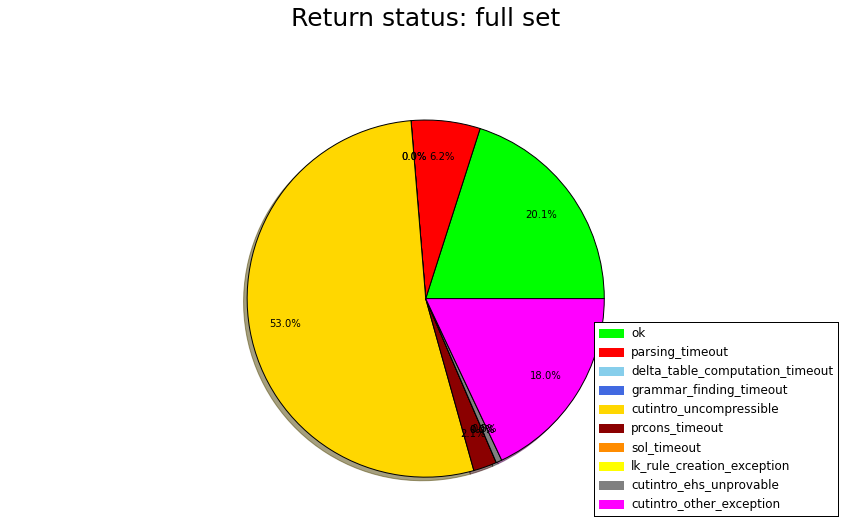

In [9]:
status = data.groupby(['status']).size()

labellst = ['ok', 
            'parsing_timeout', 
            'delta_table_computation_timeout',
            'grammar_finding_timeout',
            'cutintro_uncompressible',
            'prcons_timeout',
            'sol_timeout',
            'lk_rule_creation_exception',
            'cutintro_ehs_unprovable',
            'cutintro_other_exception'
            ]

colorlst = ['lime',
            'red',
            'skyblue',
            'royalblue',
            'gold',
            'darkred',
            'darkorange',
            'yellow',
            'gray',
            'fuchsia'
            ]

values = [status[l] if l in status else 0 for l in labellst]

handles = [mpatches.Patch(color=c, label=l) for c, l in zip(colorlst, labellst)]

plt.figure(figsize=(15,8))
plt.axis('equal')
plt.pie(values, autopct='%1.1f%%', shadow=True, colors=colorlst, radius=1.0, pctdistance=0.8)
plt.title("Return status: full set", size=25, y=1.1)
plt.legend(handles, labellst, loc = 'lower right')

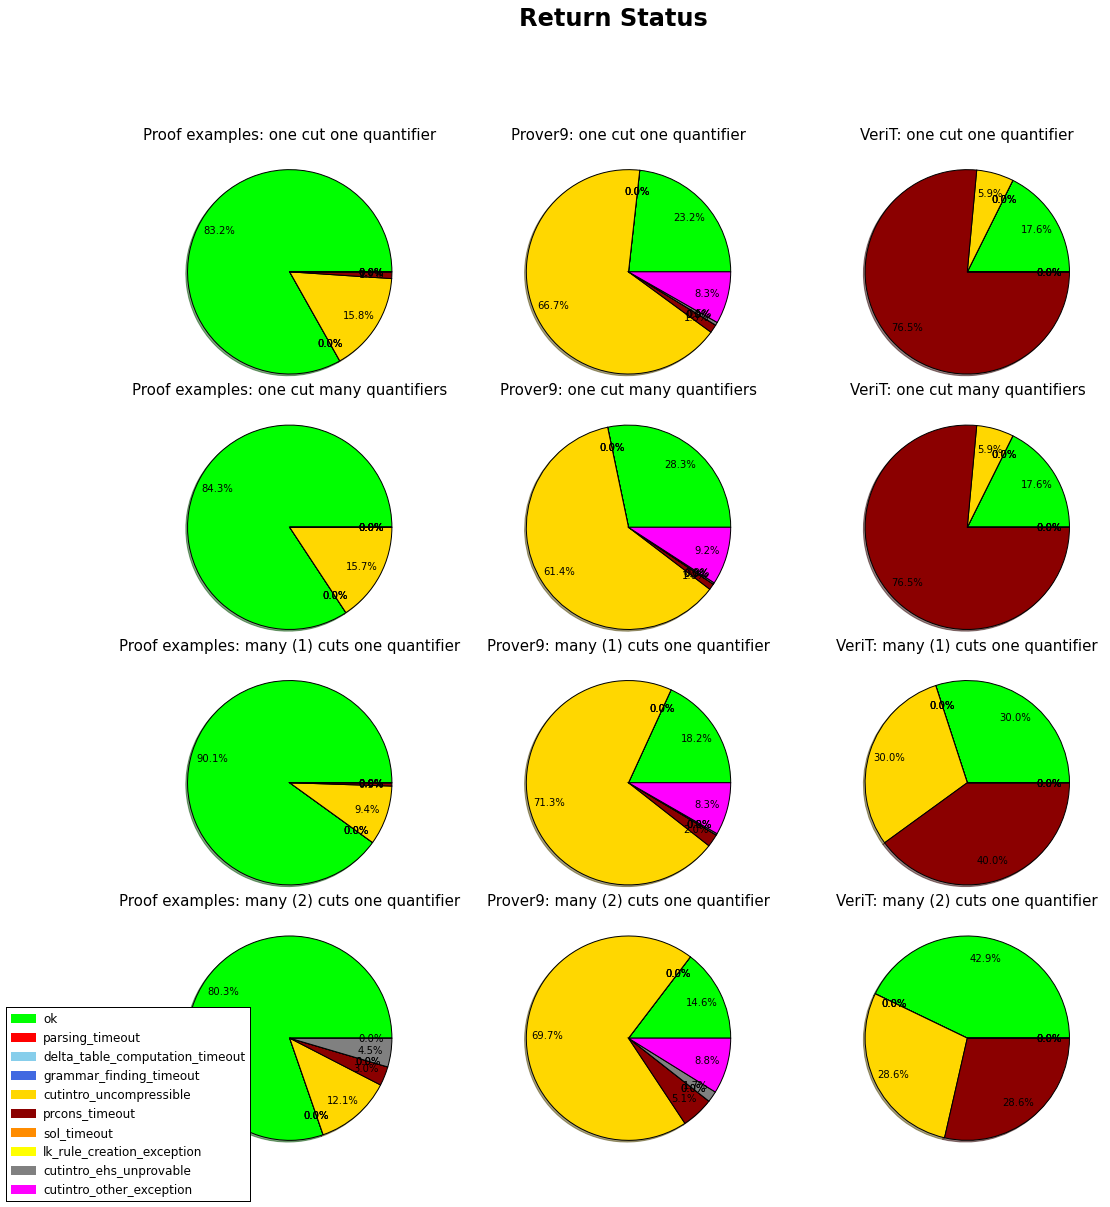

In [10]:
status_ocoq_examples = data_ocoq_examples.groupby(['status']).size()
status_ocmq_examples = data_ocmq_examples.groupby(['status']).size()
status_mcoq1_examples = data_mcoq1_examples.groupby(['status']).size()
status_mcoq2_examples = data_mcoq2_examples.groupby(['status']).size()

status_ocoq_prover9 = data_ocoq_prover9.groupby(['status']).size()
status_ocmq_prover9 = data_ocmq_prover9.groupby(['status']).size()
status_mcoq1_prover9 = data_mcoq1_prover9.groupby(['status']).size()
status_mcoq2_prover9 = data_mcoq2_prover9.groupby(['status']).size()

status_ocoq_verit = data_ocoq_verit.groupby(['status']).size()
status_ocmq_verit = data_ocmq_verit.groupby(['status']).size()
status_mcoq1_verit = data_mcoq1_verit.groupby(['status']).size()
status_mcoq2_verit = data_mcoq2_verit.groupby(['status']).size()

def getValues (status):
    return [status[l] if l in status else 0 for l in labellst]

plt.figure(1, figsize=(17,17))
plt.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)
plt.figlegend(handles, labellst, loc='lower left')
plt.suptitle("Return Status", fontsize=24, fontweight='bold')

# LINE 1: one cut one quantifier
plt.subplot(4, 3, 1)
plt.axis('equal')
plt.pie(getValues(status_ocoq_examples), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Proof examples: one cut one quantifier", size=15, y=1.1)

plt.subplot(4, 3, 2)
plt.axis('equal')
plt.pie(getValues(status_ocoq_prover9), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Prover9: one cut one quantifier", size=15, y=1.1)

plt.subplot(4, 3, 3)
plt.axis('equal')
plt.pie(getValues(status_ocoq_verit), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("VeriT: one cut one quantifier", size=15, y=1.1)

# LINE 2: one cut many quantifiers
plt.subplot(4, 3, 4)
plt.axis('equal')
plt.pie(getValues(status_ocmq_examples), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Proof examples: one cut many quantifiers", size=15, y=1.1)

plt.subplot(4, 3, 5)
plt.axis('equal')
plt.pie(getValues(status_ocmq_prover9), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Prover9: one cut many quantifiers", size=15, y=1.1)

plt.subplot(4, 3, 6)
plt.axis('equal')
plt.pie(getValues(status_ocoq_verit), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("VeriT: one cut many quantifiers", size=15, y=1.1)

# LINE 3: many (1) cuts one quantifier
plt.subplot(4, 3, 7)
plt.axis('equal')
plt.pie(getValues(status_mcoq1_examples), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Proof examples: many (1) cuts one quantifier", size=15, y=1.1)

plt.subplot(4, 3, 8)
plt.axis('equal')
plt.pie(getValues(status_mcoq1_prover9), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Prover9: many (1) cuts one quantifier", size=15, y=1.1)

plt.subplot(4, 3, 9)
plt.axis('equal')
plt.pie(getValues(status_mcoq1_verit), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("VeriT: many (1) cuts one quantifier", size=15, y=1.1)

# LINE 4: many (2) cuts one quantifier
plt.subplot(4, 3, 10)
plt.axis('equal')
plt.pie(getValues(status_mcoq2_examples), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Proof examples: many (2) cuts one quantifier", size=15, y=1.1)

plt.subplot(4, 3, 11)
plt.axis('equal')
plt.pie(getValues(status_mcoq2_prover9), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Prover9: many (2) cuts one quantifier", size=15, y=1.1)

plt.subplot(4, 3, 12)
plt.axis('equal')
plt.pie(getValues(status_mcoq2_verit), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("VeriT: many (2) cuts one quantifier", size=15, y=1.1)

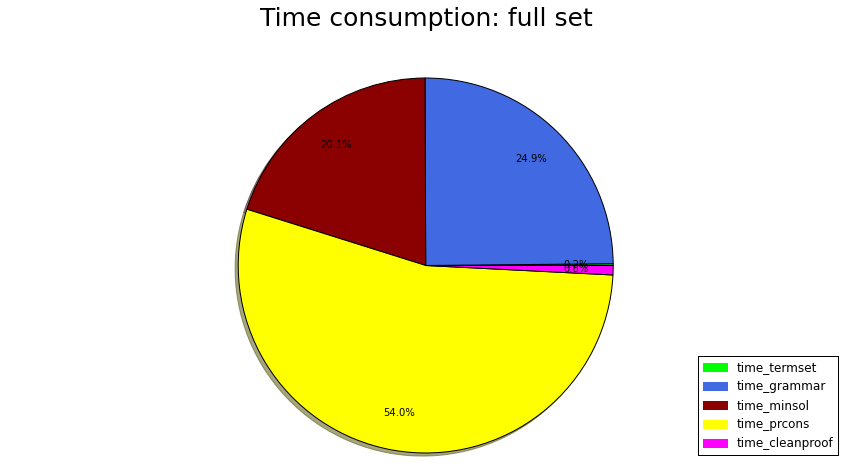

In [11]:
timecols = ['time_termset', 'time_grammar', 'time_minsol', 'time_prcons', 'time_cleanproof']
times = []
def getTimes (data):
    times = []
    for c in timecols:
        times.append(data[c].mean())
    return times

times = pd.Series(getTimes(data), index=timecols)

colorlst = ['lime',
            'royalblue',
            'darkred',
            'yellow',
            'fuchsia'
            ]

values = [times[t] for t in timecols]

handles = [mpatches.Patch(color=c, label=t) for c, t in zip(colorlst, timecols)]

plt.figure(figsize=(15,7))
plt.axis('equal')
plt.pie(values, autopct='%1.1f%%', shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Time consumption: full set", size=25, y=1.1)
plt.legend(handles, timecols, loc = 'lower right')

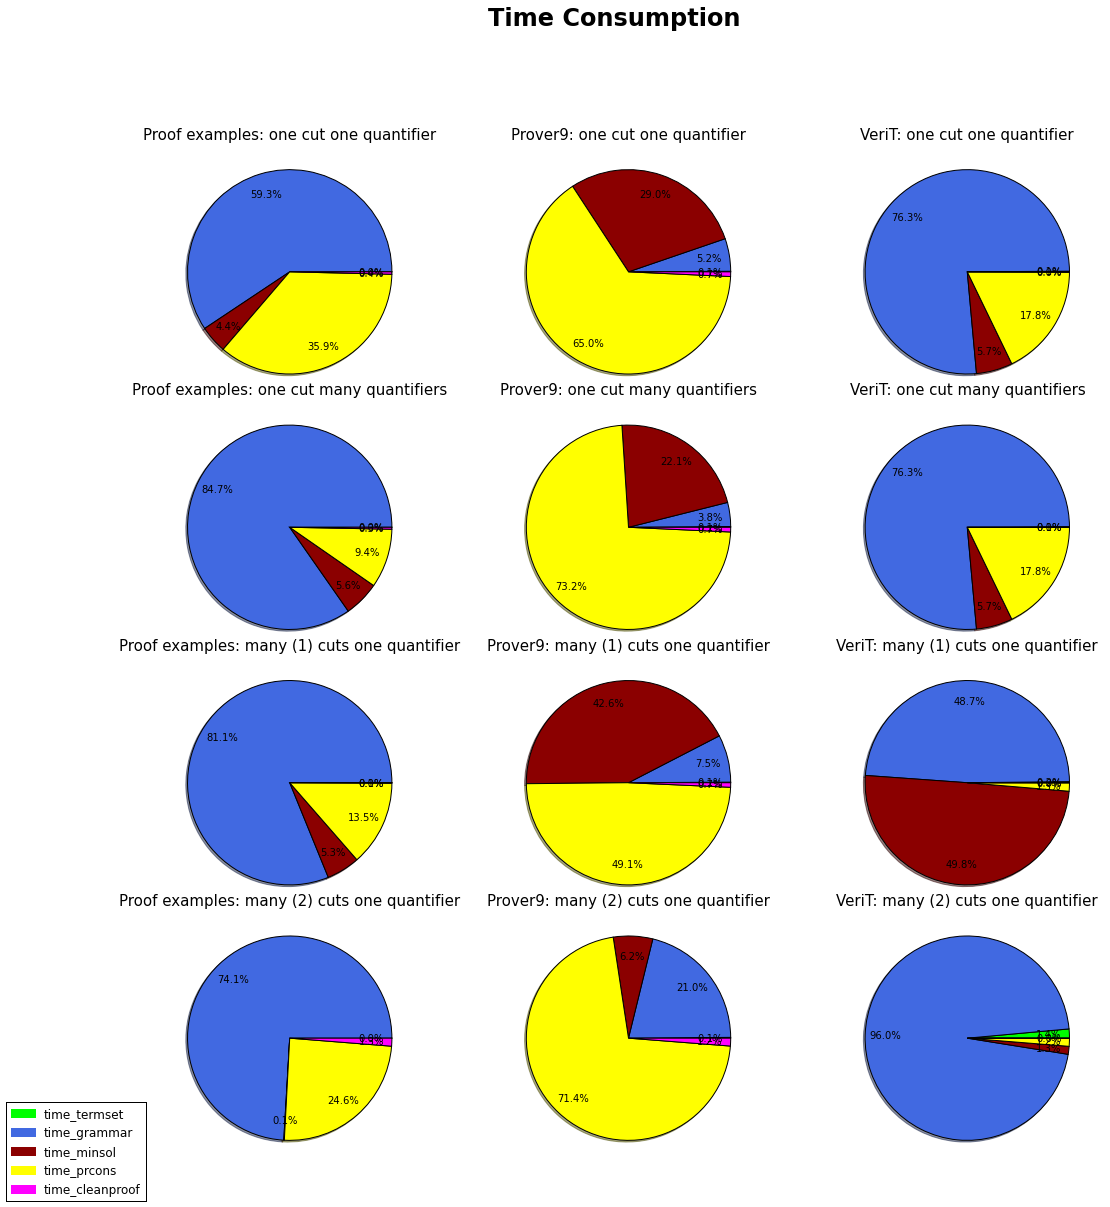

In [12]:
def getTimeValues (data):
    times = pd.Series(getTimes(data), index=timecols).replace(np.nan, 0)
    return [times[t] if t in times else 0 for t in timecols]

plt.figure(1, figsize=(17,17))
plt.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)
plt.figlegend(handles, timecols, loc='lower left')
plt.suptitle("Time Consumption", fontsize=24, fontweight='bold')

# LINE 1: one cut one quantifier
plt.subplot(4, 3, 1)
plt.axis('equal')
plt.pie(getTimeValues(data_ocoq_examples), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Proof examples: one cut one quantifier", size=15, y=1.1)

plt.subplot(4, 3, 2)
plt.axis('equal')
plt.pie(getTimeValues(data_ocoq_prover9), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Prover9: one cut one quantifier", size=15, y=1.1)

plt.subplot(4, 3, 3)
plt.axis('equal')
plt.pie(getTimeValues(data_ocoq_verit), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("VeriT: one cut one quantifier", size=15, y=1.1)

# LINE 2: one cut many quantifiers
plt.subplot(4, 3, 4)
plt.axis('equal')
plt.pie(getTimeValues(data_ocmq_examples), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Proof examples: one cut many quantifiers", size=15, y=1.1)

plt.subplot(4, 3, 5)
plt.axis('equal')
plt.pie(getTimeValues(data_ocmq_prover9), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Prover9: one cut many quantifiers", size=15, y=1.1)

plt.subplot(4, 3, 6)
plt.axis('equal')
plt.pie(getTimeValues(data_ocoq_verit), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("VeriT: one cut many quantifiers", size=15, y=1.1)

# LINE 3: many (1) cuts one quantifier
plt.subplot(4, 3, 7)
plt.axis('equal')
plt.pie(getTimeValues(data_mcoq1_examples), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Proof examples: many (1) cuts one quantifier", size=15, y=1.1)

plt.subplot(4, 3, 8)
plt.axis('equal')
plt.pie(getTimeValues(data_mcoq1_prover9), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Prover9: many (1) cuts one quantifier", size=15, y=1.1)

plt.subplot(4, 3, 9)
plt.axis('equal')
plt.pie(getTimeValues(data_mcoq1_verit), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("VeriT: many (1) cuts one quantifier", size=15, y=1.1)

# LINE 4: many (2) cuts one quantifier
plt.subplot(4, 3, 10)
plt.axis('equal')
plt.pie(getTimeValues(data_mcoq2_examples), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Proof examples: many (2) cuts one quantifier", size=15, y=1.1)

plt.subplot(4, 3, 11)
plt.axis('equal')
plt.pie(getTimeValues(data_mcoq2_prover9), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Prover9: many (2) cuts one quantifier", size=15, y=1.1)

plt.subplot(4, 3, 12)
plt.axis('equal')
plt.pie(getTimeValues(data_mcoq2_verit), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("VeriT: many (2) cuts one quantifier", size=15, y=1.1)

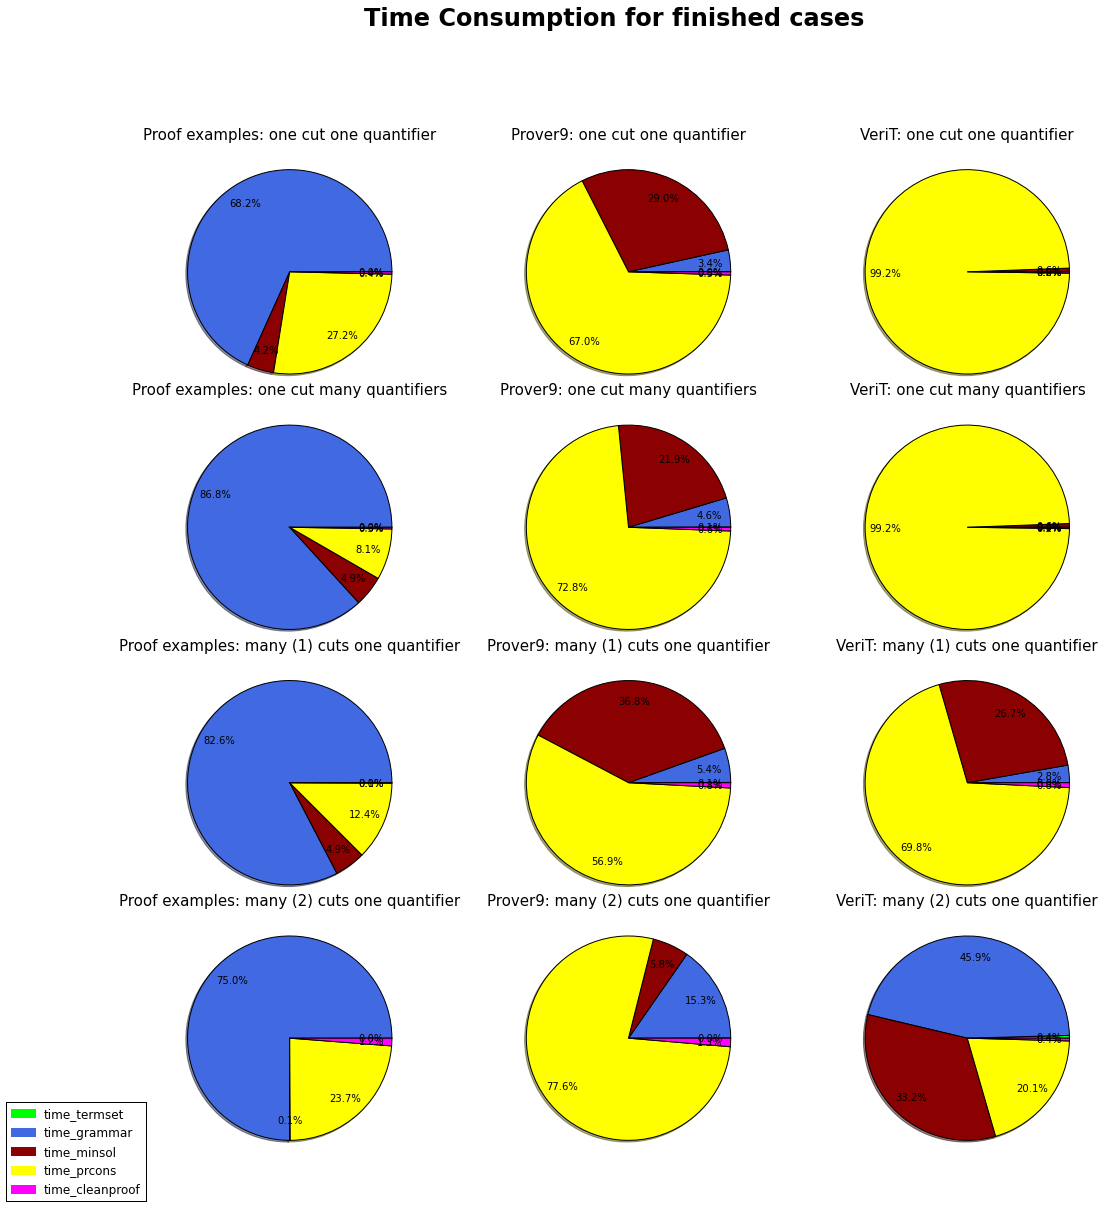

In [13]:
# Separating data by method and database (ok examples)
data_ocoq_examples_ok = data[(data.method == 'one_cut_one_quant') & (data.db == 0) & (data.status == 'ok')]
data_ocoq_prover9_ok = data[(data.method == 'one_cut_one_quant') & (data.db == 1) & (data.status == 'ok')]
data_ocoq_verit_ok = data[(data.method == 'one_cut_one_quant') & (data.db == 2) & (data.status == 'ok')]
data_ocmq_examples_ok = data[(data.method == 'one_cut_many_quant') & (data.db == 0) & (data.status == 'ok')]
data_ocmq_prover9_ok = data[(data.method == 'one_cut_many_quant') & (data.db == 1) & (data.status == 'ok')]
data_ocmq_verit_ok = data[(data.method == 'one_cut_many_quant') & (data.db == 2) & (data.status == 'ok')]
data_mcoq1_examples_ok = data[(data.method == 'many_cuts_one_quant_1') & (data.db == 0) & (data.status == 'ok')]
data_mcoq1_prover9_ok = data[(data.method == 'many_cuts_one_quant_1') & (data.db == 1) & (data.status == 'ok')]
data_mcoq1_verit_ok = data[(data.method == 'many_cuts_one_quant_1') & (data.db == 2) & (data.status == 'ok')]
data_mcoq2_examples_ok = data[(data.method == 'many_cuts_one_quant_2') & (data.db == 0) & (data.status == 'ok')]
data_mcoq2_prover9_ok = data[(data.method == 'many_cuts_one_quant_2') & (data.db == 1) & (data.status == 'ok')]
data_mcoq2_verit_ok = data[(data.method == 'many_cuts_one_quant_2') & (data.db == 2) & (data.status == 'ok')]

plt.figure(1, figsize=(17,17))
plt.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)
plt.figlegend(handles, timecols, loc='lower left')
plt.suptitle("Time Consumption for finished cases", fontsize=24, fontweight='bold')

# LINE 1: one cut one quantifier
plt.subplot(4, 3, 1)
plt.axis('equal')
plt.pie(getTimeValues(data_ocoq_examples_ok), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Proof examples: one cut one quantifier", size=15, y=1.1)

plt.subplot(4, 3, 2)
plt.axis('equal')
plt.pie(getTimeValues(data_ocoq_prover9_ok), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Prover9: one cut one quantifier", size=15, y=1.1)

plt.subplot(4, 3, 3)
plt.axis('equal')
plt.pie(getTimeValues(data_ocoq_verit_ok), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("VeriT: one cut one quantifier", size=15, y=1.1)

# LINE 2: one cut many quantifiers
plt.subplot(4, 3, 4)
plt.axis('equal')
plt.pie(getTimeValues(data_ocmq_examples_ok), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Proof examples: one cut many quantifiers", size=15, y=1.1)

plt.subplot(4, 3, 5)
plt.axis('equal')
plt.pie(getTimeValues(data_ocmq_prover9_ok), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Prover9: one cut many quantifiers", size=15, y=1.1)

plt.subplot(4, 3, 6)
plt.axis('equal')
plt.pie(getTimeValues(data_ocoq_verit_ok), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("VeriT: one cut many quantifiers", size=15, y=1.1)

# LINE 3: many (1) cuts one quantifier
plt.subplot(4, 3, 7)
plt.axis('equal')
plt.pie(getTimeValues(data_mcoq1_examples_ok), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Proof examples: many (1) cuts one quantifier", size=15, y=1.1)

plt.subplot(4, 3, 8)
plt.axis('equal')
plt.pie(getTimeValues(data_mcoq1_prover9_ok), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Prover9: many (1) cuts one quantifier", size=15, y=1.1)

plt.subplot(4, 3, 9)
plt.axis('equal')
plt.pie(getTimeValues(data_mcoq1_verit_ok), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("VeriT: many (1) cuts one quantifier", size=15, y=1.1)

# LINE 4: many (2) cuts one quantifier
plt.subplot(4, 3, 10)
plt.axis('equal')
plt.pie(getTimeValues(data_mcoq2_examples_ok), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Proof examples: many (2) cuts one quantifier", size=15, y=1.1)

plt.subplot(4, 3, 11)
plt.axis('equal')
plt.pie(getTimeValues(data_mcoq2_prover9_ok), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Prover9: many (2) cuts one quantifier", size=15, y=1.1)

plt.subplot(4, 3, 12)
plt.axis('equal')
plt.pie(getTimeValues(data_mcoq2_verit_ok), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("VeriT: many (2) cuts one quantifier", size=15, y=1.1)

In [14]:
# For Daniel
more_than_one_cut = data[(data.cuts_in > 1)]
print(more_than_one_cut.shape)
more_than_one_cut

(2709, 26)


can_sol  cuts_in                                               file  \
110         10       32  testing/TSTP/prover9/SWV/SWV480+1/Prover9---11...   
123         10       43  testing/TSTP/prover9/SWV/SWV466+1/Prover9---11...   
124         13      182  testing/TSTP/prover9/GEO/GEO070-3/Prover9---11...   
131          8        4  testing/TSTP/prover9/GRP/GRP729-1/Prover9---11...   
140         13       62  testing/TSTP/prover9/MGT/MGT054+1/Prover9---11...   
141         39      674  testing/TSTP/prover9/MGT/MGT005-1/Prover9---11...   
144          9        7  testing/TSTP/prover9/KLE/KLE150+2/Prover9---11...   
146         14      139  testing/TSTP/prover9/MGT/MGT055-1/Prover9---11...   
159          8        7  testing/TSTP/prover9/KLE/KLE035+2/Prover9---11...   
160          4       87  testing/TSTP/prover9/SEU/SEU340+1/Prover9---11...   
167         45      337  testing/TSTP/prover9/SET/SET510-6/Prover9---11...   
171          9       40  testing/TSTP/prover9/SET/SET017-7/Prover9---11...   
174          4        4  testing/TSTP/prover9/BOO/BOO003-4/Prover9---11...   
187         25      122  testing/TSTP/prover9/SWV/SWV745-1/Prover9---11...   
189         10      137  testing/TSTP/prover9/SEU/SEU291+2/Prover9---11...   
196         10       31  testing/TSTP/prover9/ALG/ALG179+1/Prover9---11...   
201         17       45  testing/TSTP/prover9/KLE/KLE010+1/Prover9---11...   
211         10       34  testing/TSTP/prover9/SWV/SWV478+1/Prover9---11...   
212         28      463  testing/TSTP/prover9/SET/SET246-6/Prover9---11...   
213         12        9  testing/TSTP/prover9/RNG/RNG019-7/Prover9---11...   
221          8        7  testing/TSTP/prover9/RNG/RNG021-7/Prover9---11...   
224          4        3  testing/TSTP/prover9/KLE/KLE150+1/Prover9---11...   
227         16       37  testing/TSTP/prover9/LCL/LCL526+1/Prover9---11...   
231          7       33  testing/TSTP/prover9/LCL/LCL196-3/Prover9---11...   
232         30      520  testing/TSTP/prover9/MGT/MGT027+1/Prover9---11...   
236          6        5  testing/TSTP/prover9/KLE/KLE064+1/Prover9---11...   
238          7       62  testing/TSTP/prover9/SET/SET018-1/Prover9---11...   
243          4        7  testing/TSTP/prover9/GRP/GRP199-1/Prover9---11...   
252         14       30  testing/TSTP/prover9/SEU/SEU187+1/Prover9---11...   
256         35      266  testing/TSTP/prover9/RNG/RNG007-1/Prover9---11...   
260         12       23  testing/TSTP/prover9/HEN/HEN012-1/Prover9---11...   
261          4       10  testing/TSTP/prover9/SWV/SWV911-1/Prover9---11...   
272         26       65  testing/TSTP/prover9/SEU/SEU102+1/Prover9---11...   
274         29       46  testing/TSTP/prover9/SWB/SWB031+2/Prover9---11...   
279         10        8  testing/TSTP/prover9/KLE/KLE078+1/Prover9---11...   
289         29      158  testing/TSTP/prover9/MGT/MGT062-1/Prover9---11...   
292          4        5  testing/TSTP/prover9/COL/COL006-2/Prover9---11...   
293         10       18  testing/TSTP/prover9/HEN/HEN005-1/Prover9---11...   
314          4        7  testing/TSTP/prover9/REL/REL009+1/Prover9---11...   
328         31      649  testing/TSTP/prover9/SEU/SEU235+1/Prover9---11...   
335         26       54  testing/TSTP/prover9/LCL/LCL241-3/Prover9---11...   
337         30      520  testing/TSTP/prover9/MGT/MGT027-1/Prover9---11...   
364         32      288  testing/TSTP/prover9/COM/COM008+2/Prover9---11...   
367         12       38  testing/TSTP/prover9/SET/SET935+1/Prover9---11...   
368          4       17  testing/TSTP/prover9/GRP/GRP029-1/Prover9---11...   
376         17       37  testing/TSTP/prover9/KLE/KLE009+1/Prover9---11...   
394          4        5  testing/TSTP/prover9/REL/REL008+3/Prover9---11...   
396          4        3  testing/TSTP/prover9/LCL/LCL756-1/Prover9---11...   
397         51     1680  testing/TSTP/prover9/MGT/MGT025+1/Prover9---11...   
409          4       14  testing/TSTP/prover9/LCL/LCL193-3/Prover9---11...   
425         13       14  test

In [15]:
data['status'].value_counts()

cutintro_uncompressible     12519
parsing_other_exception      9762
ok                           4738
cutintro_other_exception     4249
parsing_timeout              1473
maxsat_timeout               1404
nfgrammar_timeout             830
dtable_timeout                676
prcons_timeout                501
minform_timeout               392
grammar_timeout               234
minsol_timeout                232
cutintro_ehs_unprovable       125
cutintro_out_of_memory         93
total_timeout                   6
cutintro_stack_overflow         2
cleanproof_timeout              1
dtype: int64

Different grammar sizes between different methods:

In [16]:
data[data.mingrammar == data.mingrammar] \
    .groupby('file') \
    .filter(lambda x: len(set(x.mingrammar)) > 1) \
    .sort('file')[['file', 'method', 'mingrammar']]

file  \
6294            FactorialFunctionEqualityExampleProof(3)   
18820           FactorialFunctionEqualityExampleProof(3)   
25001           FactorialFunctionEqualityExampleProof(3)   
97              FactorialFunctionEqualityExampleProof(4)   
6295            FactorialFunctionEqualityExampleProof(4)   
18821           FactorialFunctionEqualityExampleProof(4)   
25002           FactorialFunctionEqualityExampleProof(4)   
69                              LinearEqExampleProof(11)   
6267                            LinearEqExampleProof(11)   
12502                           LinearEqExampleProof(11)   
18773                           LinearEqExampleProof(11)   
12503                           LinearEqExampleProof(12)   
18774                           LinearEqExampleProof(12)   
12504                           LinearEqExampleProof(13)   
18775                           LinearEqExampleProof(13)   
12505                           LinearEqExampleProof(14)   
18776                           LinearEqExampleProof(14)   
12506                           LinearEqExampleProof(15)   
18777                           LinearEqExampleProof(15)   
12507                           LinearEqExampleProof(16)   
18778                           LinearEqExampleProof(16)   
12508                           LinearEqExampleProof(17)   
18779                           LinearEqExampleProof(17)   
12509                           LinearEqExampleProof(18)   
18780                           LinearEqExampleProof(18)   
12510                           LinearEqExampleProof(19)   
18781                           LinearEqExampleProof(19)   
12511                           LinearEqExampleProof(20)   
18782                           LinearEqExampleProof(20)   
12512                           LinearEqExampleProof(21)   
18783                           LinearEqExampleProof(21)   
12513                           LinearEqExampleProof(22)   
18784                           LinearEqExampleProof(22)   
12514                           LinearEqExampleProof(23)   
18785                           LinearEqExampleProof(23)   
12515                           LinearEqExampleProof(24)   
18786                           LinearEqExampleProof(24)   
67                               LinearEqExampleProof(9)   
6265                             LinearEqExampleProof(9)   
12500                            LinearEqExampleProof(9)   
18771                            LinearEqExampleProof(9)   
24970                            LinearEqExampleProof(9)   
16                                LinearExampleProof(17)   
6214                              LinearExampleProof(17)   
12407                             LinearExampleProof(17)   
18701                             LinearExampleProof(17)   
17                                LinearExampleProof(18)   
6215                              LinearExampleProof(18)   
12408                             LinearExampleProof(18)   
18702                             LinearExampleProof(18)   
12411                             LinearExampleProof(21)   
18705                             LinearExampleProof(21)   
12412                             LinearExampleProof(22)   
18706                             LinearExampleProof(22)   
12413                             LinearExampleProof(23)   
18707                             LinearExampleProof(23)   
12414                             LinearExampleProof(24)   
18708                             LinearExampleProof(24)   
12415                             LinearExampleProof(25)   
18709                             LinearExampleProof(25)   
29                        SquareDiagonalExampleProof(11)   
6227                      SquareDiagonalExampleProof(11)   
12438                     SquareDiagonalExampleProof(11)   
18721                     SquareDiagonalExampleProof(11)   
12439                     SquareDiagonalExampleProof(12)   
18722                     SquareDiagonalExampleProof(12)   
12440                     Square